# 1. Importing and Installing Library #

In [ ]:
!pip install opencv-python
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fb056be20444f2ed0a5d1a6c916920f6eba7be6d02072e57f0d726bf5cefbbce
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wget
import skimage.draw as drw

%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import statistics

# 2. Dataset #

## 2.1. Loading Dataset ##

In [ ]:
for i in range(3):
  count = i+6
  url = "https://raw.githubusercontent.com/Andishafira/nannofossil_discoaster-ppl-dataset_IMAGE-ENHANCE/main/raw_image/discoaster"+str(count)+".jpg"
  if not os.path.exists("discoaster"+str(count)+".jpg"):
    wget.download(url, "discoaster"+str(count)+".jpg")

## 2.2. Loading Dataset ##

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
ori_varString = []
for i in range(3):
  img_bgr = "discoaster" + str(i+6) + ".jpg"
  globals()[f"image_ori{i+1}"] = cv2.imread(img_bgr)
  ori_varString.append("image_ori"+str(i+1))
# Mengubah setiap string menjadi array
ori_var = [eval(string) for string in ori_varString]

In [ ]:
def show_images(images_var,title):
    num_rows = 1
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))
    fig.suptitle(title)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images_var[i])
        ax.set_title(f"Image {i+1}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

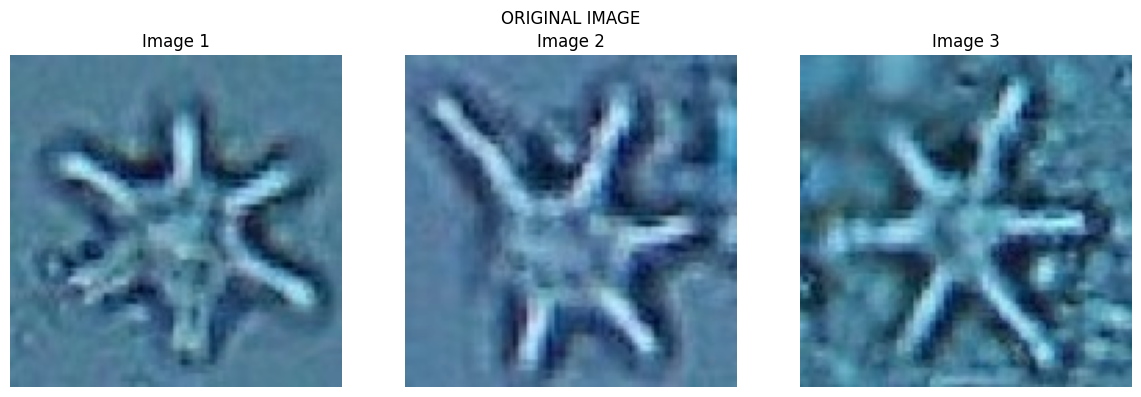

In [ ]:
show_images(ori_var, "ORIGINAL IMAGE")

# 3. Image Operation #

## 3.1. Extract Background Channel ##

**convert 2 D**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
ori_gray_varString = []
for i in range(3):
  img_gray = ori_var[i]
  globals()[f"grayImg{i+1}"] = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
  ori_gray_varString.append("grayImg"+str(i+1))
# Mengubah setiap string menjadi array
ori_gray_var = [eval(string) for string in ori_gray_varString]

In [ ]:
def show_images_gray(images_var,title):
    num_rows = 1
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))
    fig.suptitle(title)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images_var[i], cmap='gray')
        ax.set_title(f"Gambar {i+1}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

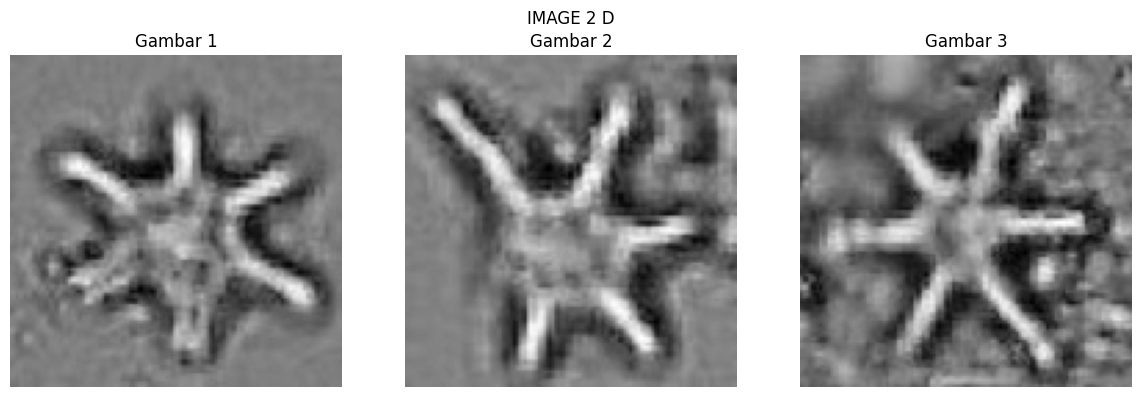

In [ ]:
show_images_gray(ori_gray_var,"IMAGE 2 D")

## 3.3. Filtering

###**Bilateral Filtering**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
gray_bilFilter_varString = []
for i in range(3):
  img_gray = ori_gray_var[i]
  globals()[f"bilFilter_grayImg{i+1}"] = cv2.bilateralFilter(img_gray, 9, 45, 45)
  gray_bilFilter_varString.append("bilFilter_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
gray_bilFilter_var = [eval(string) for string in gray_bilFilter_varString]

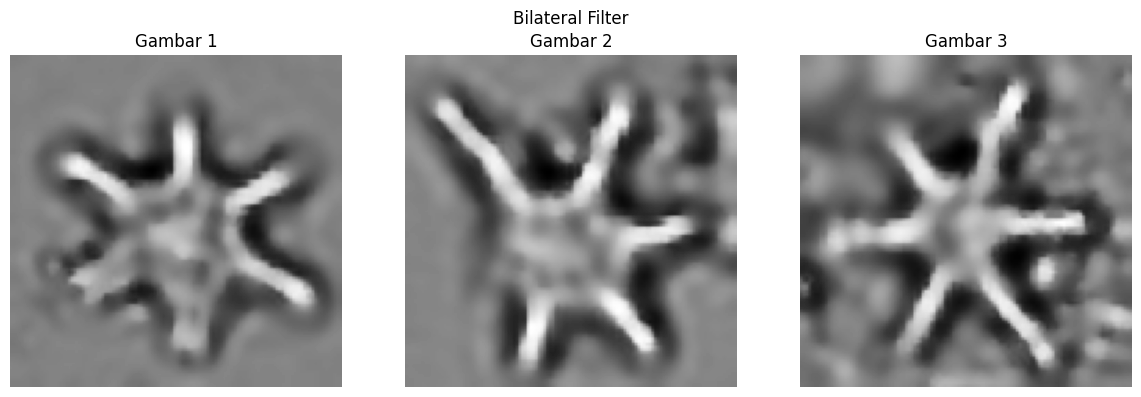

In [ ]:
show_images_gray(gray_bilFilter_var,"Bilateral Filter")

###**Median Filter**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
gray_medianFilter_varString = []
for i in range(3):
  img_gray = ori_gray_var[i]
  globals()[f"medianFilter_grayImg{i+1}"] = cv2.medianBlur(img_gray, 3)
  gray_medianFilter_varString.append("medianFilter_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
gray_medianFilter_var = [eval(string) for string in gray_medianFilter_varString]

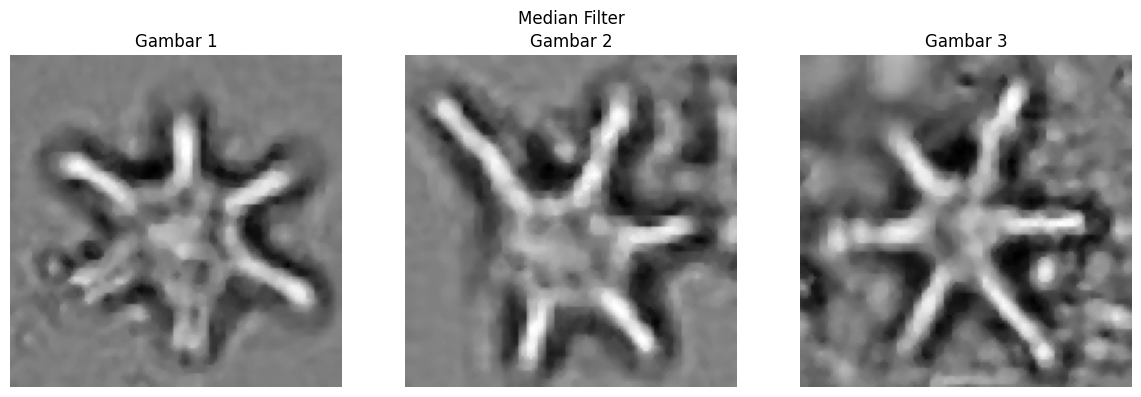

In [ ]:
show_images_gray(gray_medianFilter_var,"Median Filter")

###**Gaussian Filter**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
gray_gaussFilter_varString = []
for i in range(3):
  img_gray = ori_gray_var[i]
  globals()[f"gaussFilter_grayImg{i+1}"] = cv2.GaussianBlur(img_gray,(3,3),45)
  gray_gaussFilter_varString.append("gaussFilter_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
gray_gaussFilter_var = [eval(string) for string in gray_gaussFilter_varString]

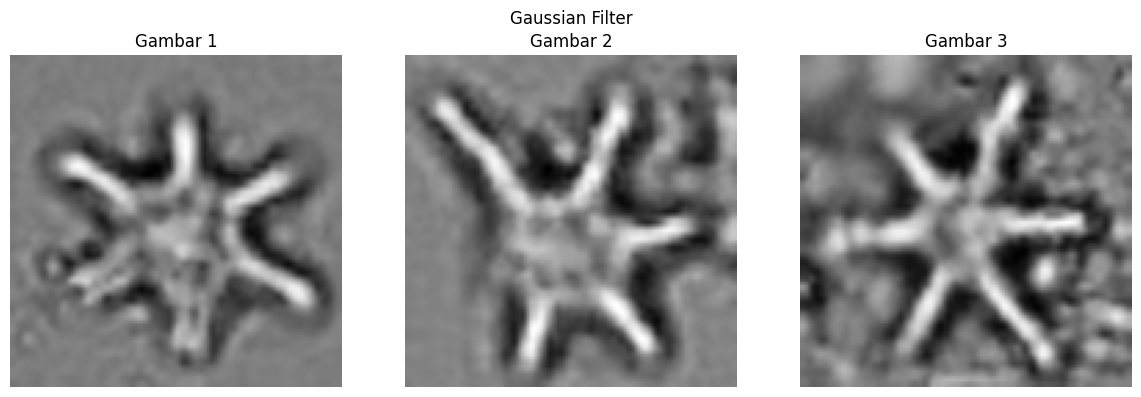

In [ ]:
show_images_gray(gray_gaussFilter_var,"Gaussian Filter")

###**Mean Filter**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
gray_meanFilter_varString = []
for i in range(3):
  img_gray = ori_gray_var[i]
  globals()[f"meanFilter_grayImg{i+1}"] = cv2.blur(img_gray,(3,3))
  gray_meanFilter_varString.append("meanFilter_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
gray_meanFilter_var = [eval(string) for string in gray_meanFilter_varString]

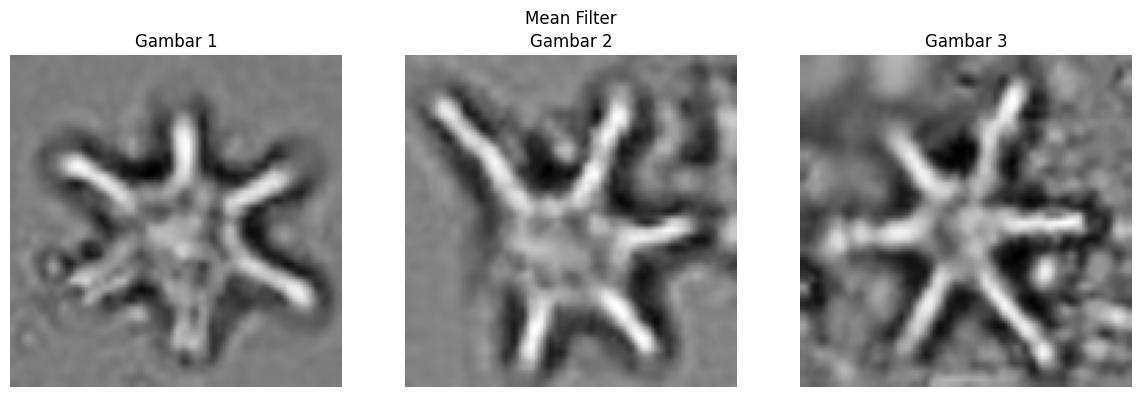

In [ ]:
show_images_gray(gray_meanFilter_var,"Mean Filter")

###**MIoU Test based normal threshold**

####BUAT THRESHOLDNYA DULU

**MEAN FILTER**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
meanF_TH_varString = []
for i in range(3):
  mean_gray = gray_meanFilter_var[i]
  _, globals()[f"meanF_TH_grayImg{i+1}"] = cv2.threshold(mean_gray, 137, 255, cv2.THRESH_BINARY)
  meanF_TH_varString.append("meanF_TH_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
meanF_TH_var = [eval(string) for string in meanF_TH_varString]

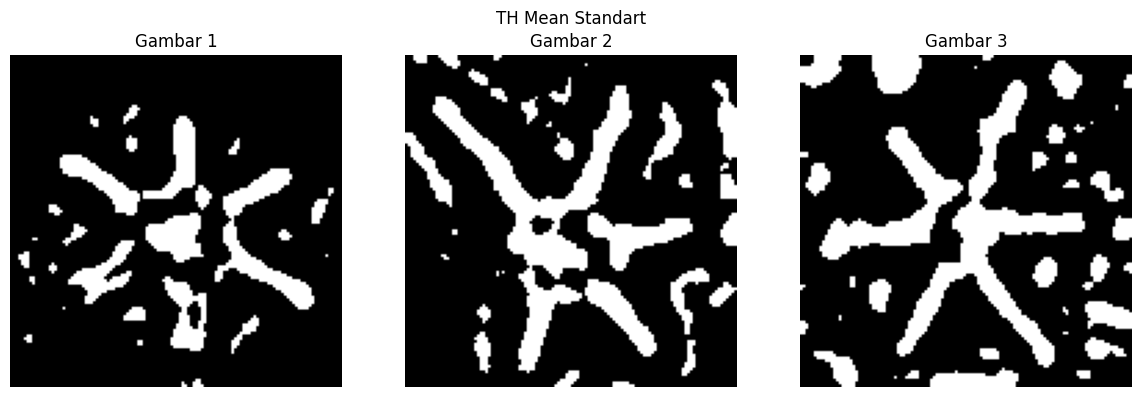

In [ ]:
show_images_gray(meanF_TH_var, "TH Mean Standart")

**MEDIAN FILTER**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
medianF_TH_varString = []
for i in range(3):
  median_gray = gray_medianFilter_var[i]
  _, globals()[f"medianF_TH_grayImg{i+1}"] = cv2.threshold(median_gray, 137, 255, cv2.THRESH_BINARY)
  medianF_TH_varString.append("medianF_TH_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
medianF_TH_var = [eval(string) for string in medianF_TH_varString]

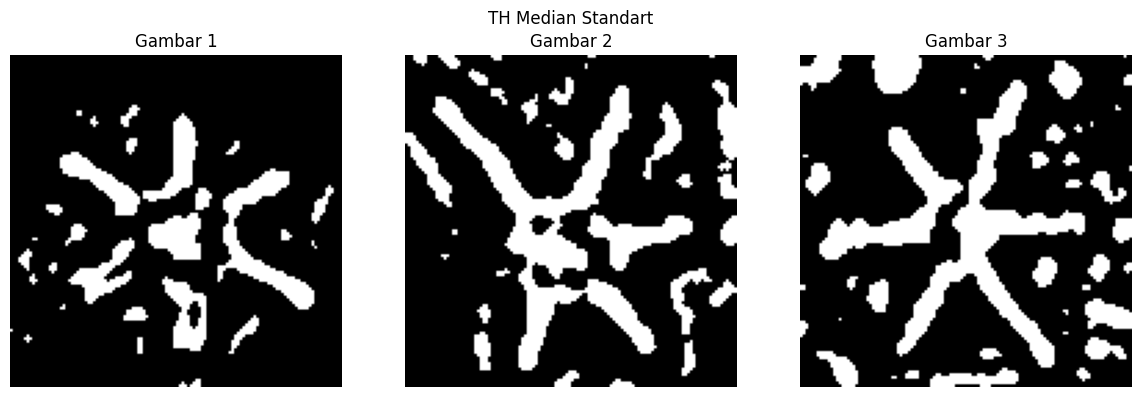

In [ ]:
show_images_gray(medianF_TH_var, "TH Median Standart")

**GAUSSIAN FILTER**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
gaussF_TH_varString = []
for i in range(3):
  gauss_gray = gray_gaussFilter_var[i]
  _, globals()[f"gaussF_TH_grayImg{i+1}"] = cv2.threshold(gauss_gray, 137, 255, cv2.THRESH_BINARY)
  gaussF_TH_varString.append("gaussF_TH_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
gaussF_TH_var = [eval(string) for string in gaussF_TH_varString]

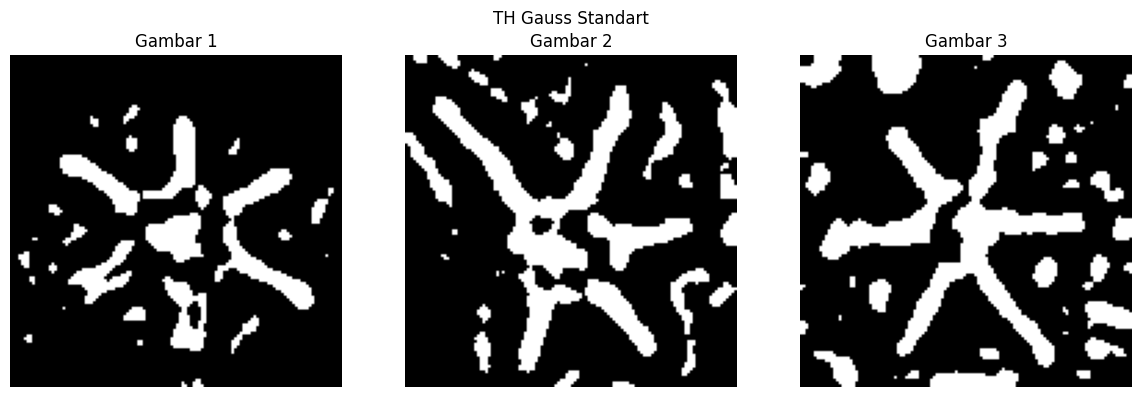

In [ ]:
show_images_gray(gaussF_TH_var, "TH Gauss Standart")

**BILATERAL FILTER**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
bilF_TH_varString = []
for i in range(3):
  bil_gray = gray_bilFilter_var[i]
  _, globals()[f"bilF_TH_grayImg{i+1}"] = cv2.threshold(bil_gray, 137, 255, cv2.THRESH_BINARY)
  bilF_TH_varString.append("bilF_TH_grayImg"+str(i+1))
# Mengubah setiap string menjadi array
bilF_TH_var = [eval(string) for string in bilF_TH_varString]

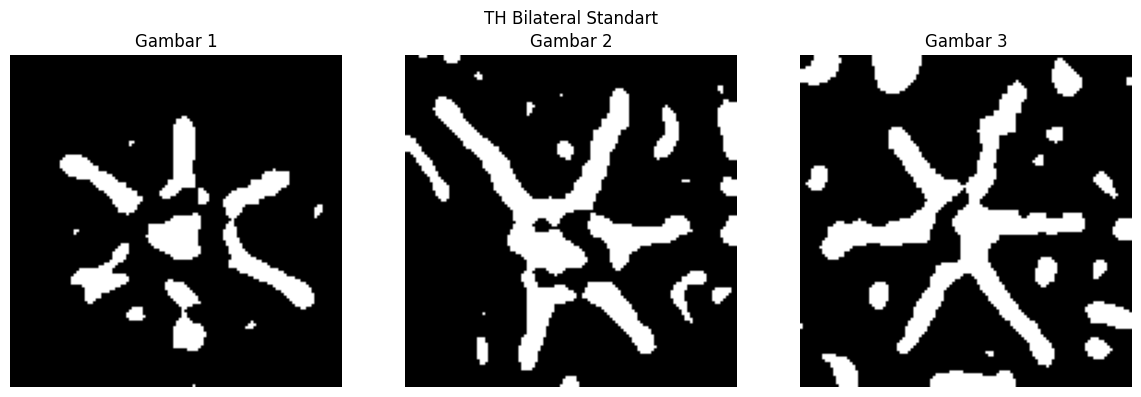

In [ ]:
show_images_gray(bilF_TH_var, "TH Bilateral Standart")

####INISIALISASI GROUNDTRUTH

In [ ]:
for i in range(3):
  count = i+6
  url = "https://raw.githubusercontent.com/Andishafira/nannofossil_discoaster-ppl-dataset_IMAGE-ENHANCE/main/ground_truth/citra"+str(count)+".txt"
  if not os.path.exists("citra"+str(count)+".txt"):
    wget.download(url, "citra"+str(count)+".txt")

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
imageGT_varString = []
for i in range(3):
  imageGT = "citra" + str(i+6) + ".txt"
  globals()[f"imageGT{i+1}"] = imageGT
  imageGT_varString.append("imageGT"+str(i+1))
# Mengubah setiap string menjadi array
imageGT_var = [eval(string) for string in imageGT_varString]

In [ ]:
def contour_to_mask(cont, img_shape):
    """Return mask given a contour and the shape of image
    """
    c = np.loadtxt(cont)
    mask = np.zeros(img_shape[:-1], dtype=np.uint8)
    rr, cc = drw.polygon(c[:,1], c[:,0])
    mask[rr, cc] = 1
    return mask

def read_groundTruth(groundTruth):
  cont = groundTruth
  img_shape = (120, 120, 3)
  mask = contour_to_mask(cont, img_shape)
  return mask

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
imageGT_mask_varString = []
for i in range(3):
  imageGT_mask = imageGT_var[i]
  globals()[f"imageGT_mask{i+1}"] = read_groundTruth(imageGT_mask)
  imageGT_mask_varString.append("imageGT_mask"+str(i+1))
# Mengubah setiap string menjadi array
imageGT_mask_var = [eval(string) for string in imageGT_mask_varString]

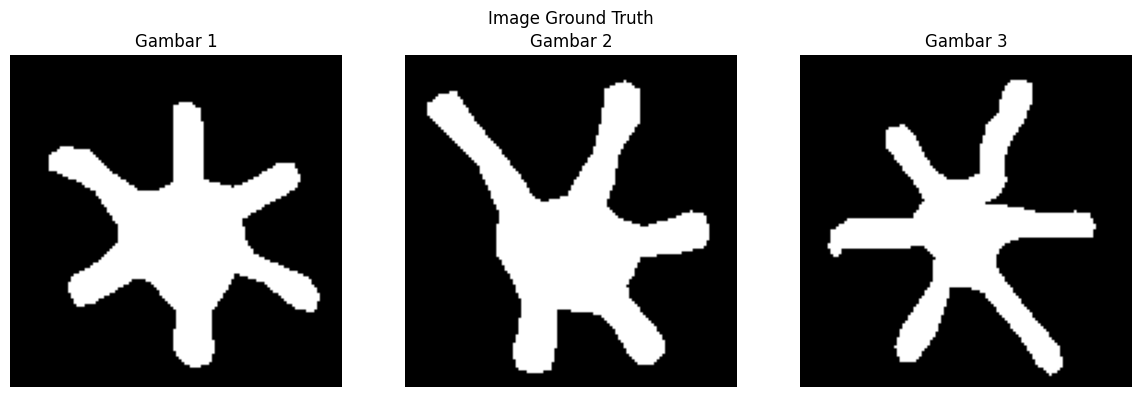

In [ ]:
show_images_gray(imageGT_mask_var, "Image Ground Truth")

In [ ]:
def calculate_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def calculate_miou(gt_mask_path, pred_mask_path):
    gt_mask = gt_mask_path
    pred_mask = pred_mask_path

    iou = calculate_iou(gt_mask, pred_mask)
    return iou

####MIoU Result

**MEAN**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
MIoU_mean_varString = []
for i in range(3):
  result_image = meanF_TH_var[i]
  gt_image = imageGT_mask_var[i]
  MIoU_mean_result = calculate_miou(gt_image, result_image)
  MIoU_mean_varString.append(MIoU_mean_result)
mean_MIoU_mean = np.mean(MIoU_mean_varString)

In [ ]:
print(f"MIoU result of Mean Filter is {mean_MIoU_mean}")

MIoU result of Mean Filter is 0.43999823199066396


**MEDIAN**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
MIoU_median_varString = []
for i in range(3):
  result_image = medianF_TH_var[i]
  gt_image = imageGT_mask_var[i]
  MIoU_median_result = calculate_miou(gt_image, result_image)
  MIoU_median_varString.append(MIoU_median_result)
mean_MIoU_median = np.mean(MIoU_median_varString)

In [ ]:
print(f"MIoU result of Median Filter is {mean_MIoU_median}")

MIoU result of Median Filter is 0.43813232630065574


**GAUSSIAN**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
MIoU_gauss_varString = []
for i in range(3):
  result_image = gaussF_TH_var[i]
  gt_image = imageGT_mask_var[i]
  MIoU_gauss_result = calculate_miou(gt_image, result_image)
  MIoU_gauss_varString.append(MIoU_gauss_result)
mean_MIoU_gauss = np.mean(MIoU_gauss_varString)

In [ ]:
print(f"MIoU result of Gaussian Filter is {mean_MIoU_gauss}")

MIoU result of Gaussian Filter is 0.4399257682225481


**BILATERAL**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
MIoU_bil_varString = []
for i in range(3):
  result_image = bilF_TH_var[i]
  gt_image = imageGT_mask_var[i]
  MIoU_bil_result = calculate_miou(gt_image, result_image)
  MIoU_bil_varString.append(MIoU_bil_result)
mean_MIoU_bil = np.mean(MIoU_bil_varString)

In [ ]:
print(f"MIoU result of Bilateral Filter is {mean_MIoU_bil}")

MIoU result of Bilateral Filter is 0.4660206492766208


## 3.4. Quantile Thresholding ##

In [ ]:
def quantilethreshold(grayimage,n=4,firstquantile=True,lastquantile=True):
  q = statistics.quantiles(np.array(grayimage).flatten().tolist(), n=n)

  height,width = grayimage.shape
  image = np.zeros((height, width), dtype=np.uint8)

  for i in range(height):
    for j in range(width):
      if firstquantile:
        if not(grayimage[i][j] <= round(q[0])):
          image[i][j] = 255
      elif lastquantile:
        if not(grayimage[i][j] >= round(q[len(q)-1])):
          image[i][j] = 255
      elif firstquantile and lastquantile:
        if not(grayimage[i][j] >= round(q[len(q)-1]) or grayimage[i][j] <= round(q[0])):
          image[i][j] = 255
      else:
        if (grayimage[i][j] >= round(q[len(q)-1]) or grayimage[i][j] <= round(q[0])):
          image[i][j] = 255
  return image

### **3.4.1. High Value Pixels**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
high_th_bilFilter_varString = []
for i in range(3):
  bilFilter_img_gray = gray_bilFilter_var[i]
  globals()[f"high_quantileTh_bilFilter{i+1}"] = quantilethreshold(bilFilter_img_gray, 8, firstquantile=False, lastquantile=True)
  high_th_bilFilter_varString.append("high_quantileTh_bilFilter"+str(i+1))
# Mengubah setiap string menjadi array
high_th_bilFilter_var = [eval(string) for string in high_th_bilFilter_varString]

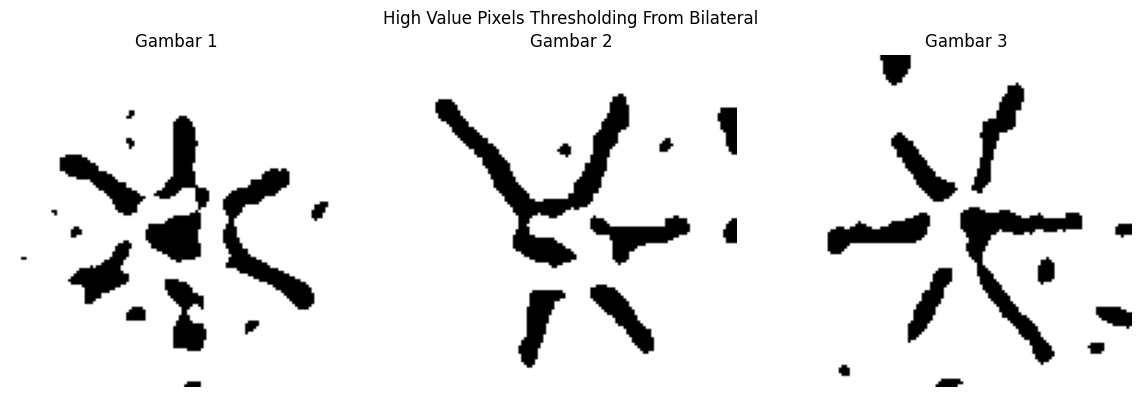

In [ ]:
show_images_gray(high_th_bilFilter_var, "High Value Pixels Thresholding From Bilateral")

### **3.4.2. Medium Value Pixels**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
med_th_bilFilter_varString = []
for i in range(3):
  bilFilter_img_gray = gray_bilFilter_var[i]
  globals()[f"med_quantileTh_bilFilter{i+1}"] = quantilethreshold(bilFilter_img_gray, 8, firstquantile=False, lastquantile=False)
  med_th_bilFilter_varString.append("med_quantileTh_bilFilter"+str(i+1))
# Mengubah setiap string menjadi array
med_th_bilFilter_var = [eval(string) for string in med_th_bilFilter_varString]

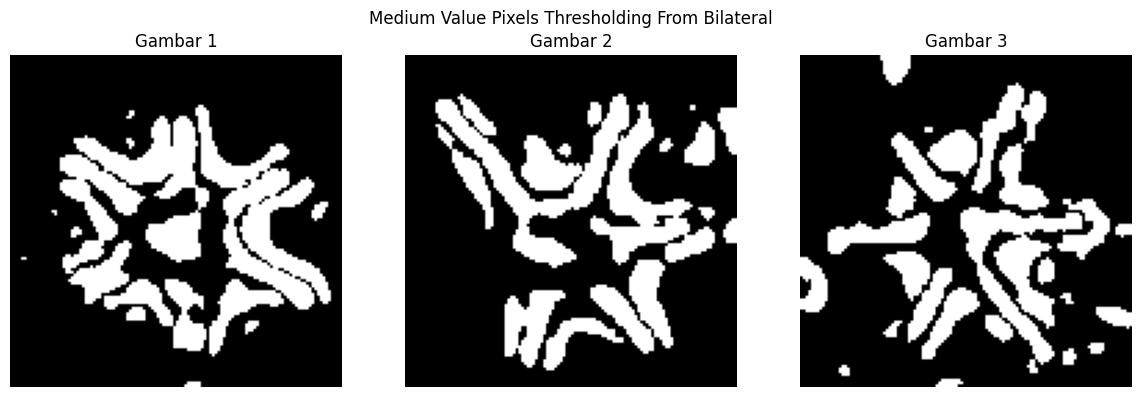

In [ ]:
show_images_gray(med_th_bilFilter_var, "Medium Value Pixels Thresholding From Bilateral")

### **3.4.3. Low Value Pixels**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
low_th_bilFilter_varString = []
for i in range(3):
  bilFilter_img_gray = gray_bilFilter_var[i]
  globals()[f"low_quantileTh_bilFilter{i+1}"] = quantilethreshold(bilFilter_img_gray, 8, firstquantile=True, lastquantile=False)
  low_th_bilFilter_varString.append("low_quantileTh_bilFilter"+str(i+1))
# Mengubah setiap string menjadi array
low_th_bilFilter_var = [eval(string) for string in low_th_bilFilter_varString]

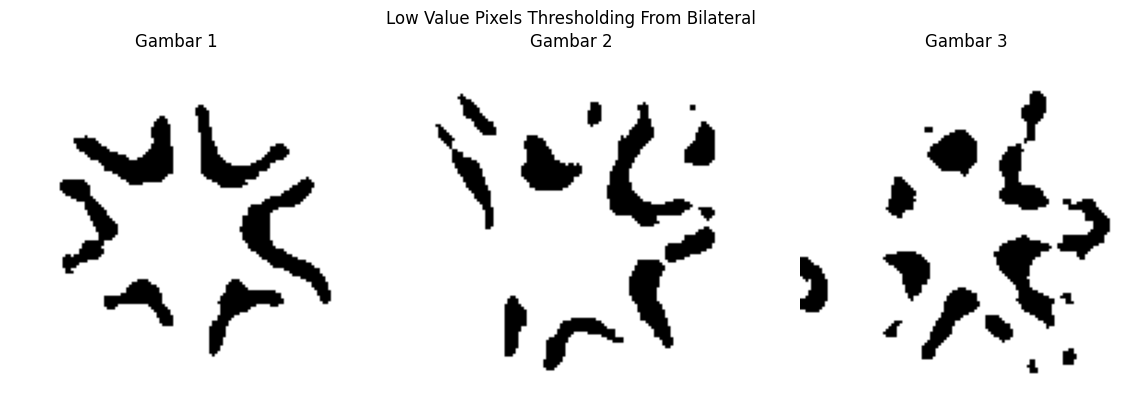

In [ ]:
show_images_gray(low_th_bilFilter_var, "Low Value Pixels Thresholding From Bilateral")

**Hasil yang didapatkan dari pembagian quantile thresholding ini yaitu: High value pixels menghasilkan segmentasi yang lebih baik dibandingkan yang lain berdasarkan ground truth dari citra nannofossil. Sehingga, proses operasi morfologi akan menggunakan hasil segmentasi dari high-pixel value metode quantile thresholding.**

## 3.6. Morphology Operations ##

###3.6.X. Dilation

**Closing High Pixels Threshold**

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
invert_highPixels_Qth_bilF_varString = []
for i in range(3):
  highPixels_Qth_bilF = high_th_bilFilter_var[i]
  globals()[f"invert_highPixels_Qth_bilF{i+1}"] = np.invert(highPixels_Qth_bilF)
  invert_highPixels_Qth_bilF_varString.append("invert_highPixels_Qth_bilF"+str(i+1))
# Mengubah setiap string menjadi array
invert_highPixels_Qth_bilF_var = [eval(string) for string in invert_highPixels_Qth_bilF_varString]

In [ ]:
def twoStep_dilation(image,strel):
  dilate_image = cv2.dilate(image, strel)
  dilate_image = cv2.dilate(dilate_image, strel)
  return dilate_image

In [ ]:
strel_dilate = np.array([[0,1,1,0],
                        [1,1,1,1],
                        [1,1,1,1],
                        [0,1,1,0]], dtype=np.uint8)

# Membuat variabel yang berbeda pada setiap iterasi
dilation_highPixel_varString = []
for i in range(3):
  invert_highPixels_Qth_bilF = invert_highPixels_Qth_bilF_var[i]
  globals()[f"dilation_highPixel{i+1}"] = twoStep_dilation(invert_highPixels_Qth_bilF, strel_dilate)
  dilation_highPixel_varString.append("dilation_highPixel"+str(i+1))
# Mengubah setiap string menjadi array
dilation_highPixel_var = [eval(string) for string in dilation_highPixel_varString]

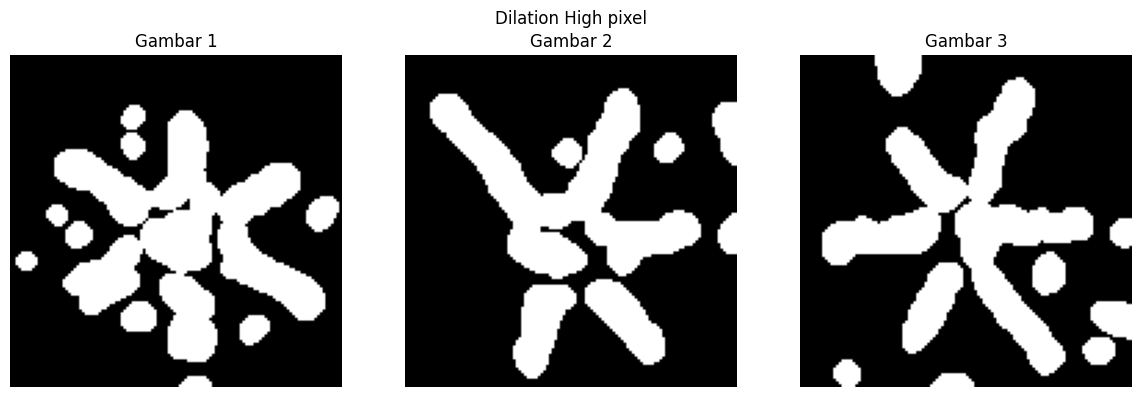

In [ ]:
show_images_gray(dilation_highPixel_var,"Dilation High pixel")

### 3.6.2.Closing ###

**Closing High Pixels Threshold**

In [ ]:
strel_closing = np.array([[0,1,0],
                        [1,1,1],
                        [0,1,0]], dtype=np.uint8)

In [ ]:
closing_highPixel_varString = []
for i in range(3):
  dilate_img_high = dilation_highPixel_var[i]
  globals()[f"closing_high{i+1}"] = cv2.morphologyEx(dilate_img_high, cv2.MORPH_CLOSE, strel_closing)
  closing_highPixel_varString.append("closing_high"+str(i+1))
# Mengubah setiap string menjadi array
closing_highPixel_var = [eval(string) for string in closing_highPixel_varString]

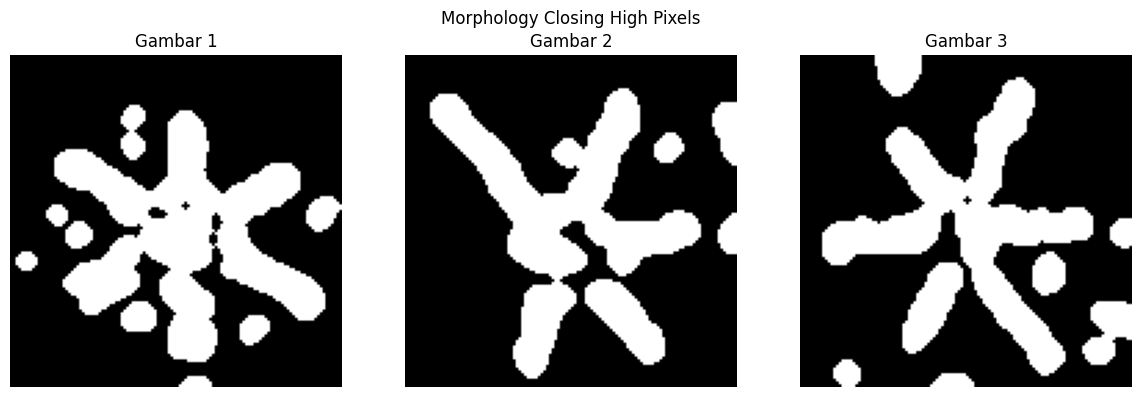

In [ ]:
show_images_gray(closing_highPixel_var,"Morphology Closing High Pixels")

#Evaluasi MIoU Using Ground Truth

In [ ]:
# Membuat variabel yang berbeda pada setiap iterasi
MIoU_varString3 = []
for i in range(3):
  result_image = closing_highPixel_var[i]
  gt_image = imageGT_mask_var[i]
  globals()[f"MIoU{i+1}"] = calculate_miou(gt_image, result_image)
  MIoU_varString3.append("MIoU"+str(i+1))
# Mengubah setiap string menjadi array
MIoU_var3 = [eval(string) for string in MIoU_varString3]

In [ ]:
for i in range(3):
  print(f"Nilai MIoU dari citra {i+1} adalah {MIoU_var3[i]}")

Nilai MIoU dari citra 1 adalah 0.6553636169759011
Nilai MIoU dari citra 2 adalah 0.7019955654101996
Nilai MIoU dari citra 3 adalah 0.6129032258064516
